In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json

In [63]:
df = pd.read_csv('SIPRI-Milex-Current-Dollars.csv',index_col='Country')
df = df.drop(columns='Notes')
df = df.dropna()
df = df[~df.index.str.contains('\*')] #dropping nonstate actors

In [64]:
np.unique(df.values)

array(['...', '0', '0.1', ..., '9993.7', '9998.2', 'xxx'], dtype=object)

In [65]:
df = df.transpose()
df = df.replace('\.\.\.|xxx',np.NaN,regex=True)
df.head()

Country,Algeria,Libya,Morocco,Tunisia,Angola,Benin,Botswana,Burkina Faso,Burundi,Cameroon,...,Kuwait,Lebanon,Oman,Qatar,Saudi Arabia,Syria,Türkiye,United Arab Emirates,"Yemen, North",Yemen
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,197.7,NaN,NaN,NaN
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,213,NaN,NaN,NaN
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.8,NaN,NaN,NaN
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,257.8,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,294,NaN,NaN,NaN


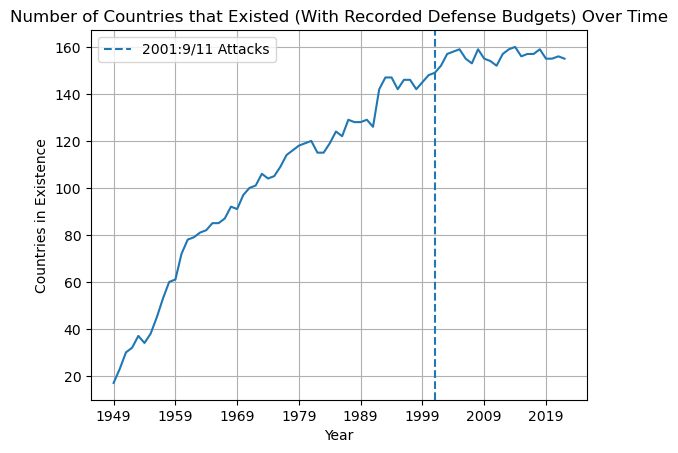

In [66]:
yearly_total_countries = df.notna().sum(axis=1)
yearly_total_countries.plot()
plt.xlabel('Year')
plt.ylabel('Countries in Existence')
plt.title('Number of Countries that Existed (With Recorded Defense Budgets) Over Time')
plt.axvline(x= 52, linestyle='--',label='2001:9/11 Attacks')

plt.grid()
plt.legend()
plt.show()

## Constructing nodelist

In [67]:
nodelist = df.iloc[52:]
nodelist = nodelist.dropna(axis=1)
nodelist = nodelist.astype('float')
nodelist = nodelist.sum(axis=0)
nodelist

Country
Algeria          151711.2
Morocco           69976.0
Tunisia           16003.7
Angola            54882.7
Botswana           8224.4
                  ...    
Kuwait           116844.9
Lebanon           39797.0
Oman             112678.6
Saudi Arabia    1111174.4
Türkiye          333878.4
Length: 126, dtype: float64

In [68]:
#CLEANUP to JSON FILE
arms_transfer_nodes = ["Afghanistan", "African Union**", "Albania", "Algeria", "Angola", "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia-Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Cote d'Ivoire", "Croatia", "Cuba", "Cyprus", "Czechia", "DR Congo", "Darfur rebels (Sudan)*", "Denmark", "Djibouti", "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Guatemala", "Guinea", "Guyana", "Hamas (Palestine)*", "Hezbollah (Lebanon)*", "Honduras", "Houthi rebels (Yemen)*", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Kosovo", "Kuwait", "Kyrgyzstan", "LRA (Uganda)*", "LTTE (Sri Lanka)*", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Libya GNC", "Libya HoR", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "NATO**", "NLA (Macedonia)*", "NTC (Libya)*", "Namibia", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Korea", "North Macedonia", "Northern Alliance (Afghanistan)*", "Norway", "OSCE**", "Oman", "PIJ (Israel/Palestine)*", "PKK (Turkey)*", "PRC (Israel/Palestine)*", "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Qatar", "RUF (Sierra Leone)*", "Regional Security System**", "Romania", "Russia", "Rwanda", "Samoa", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Syria rebels*", "Taiwan", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "UAE", "UIC (Somalia)*", "Uganda", "Ukraine", "Ukraine Rebels*", "United Kingdom", "United Nations**", "United States", "United Wa State (Myanmar)*", "Unknown rebel group*", "Unknown recipient(s)", "Uruguay", "Uzbekistan", "Vanuatu", "Venezuela", "Viet Nam", "Western Sahara", "Yemen", "Zambia", "Zimbabwe", "eSwatini"]

In [69]:
anomolies = [country for country in nodelist if country not in arms_transfer_nodes]
#the following countries are in the nodelist but not represented in the edges. They may be misnamed

In [70]:
nodelist_replacements = {'Korea,South':'South Korea','Kyrgyz Republic':'Kyrgyzstan','United States of America':'United States','Türkiye':'Turkey'}

nodelist = nodelist.to_dict()
nodelist = {nodelist_replacements.get(node,node): np.round(nodelist[node],3) for node in nodelist}

In [71]:
print(nodelist)

{'Algeria': 151711.2, 'Morocco': 69976.0, 'Tunisia': 16003.7, 'Angola': 54882.7, 'Botswana': 8224.4, 'Burkina Faso': 4003.5, 'Cameroon': 7251.2, 'Cape Verde': 191.8, 'Ethiopia': 9289.0, 'Ghana': 3639.4, 'Kenya': 15516.1, 'Lesotho': 907.2, 'Madagascar': 1572.6, 'Malawi': 1065.0, 'Mali': 5498.4, 'Mauritius': 361.8, 'Mozambique': 2954.6, 'Namibia': 7253.6, 'Nigeria': 39163.3, 'Rwanda': 1958.3, 'Senegal': 5173.7, 'Seychelles': 378.5, 'Sierra Leone': 647.5, 'South Africa': 74901.3, 'Eswatini': 1560.2, 'Tanzania': 8422.6, 'Uganda': 9114.9, 'Belize': 376.9, 'Costa Rica': 0.0, 'Dominican Republic': 8886.9, 'El Salvador': 4973.8, 'Guatemala': 4959.4, 'Haiti': 117.1, 'Honduras': 5161.4, 'Jamaica': 2860.3, 'Mexico': 114302.8, 'Nicaragua': 1318.6, 'Panama': 0.0, 'Trinidad and Tobago': 3156.2, 'Canada': 397645.5, 'United States': 14028958.2, 'Argentina': 71870.1, 'Bolivia': 8866.1, 'Brazil': 500987.5, 'Chile': 97127.0, 'Colombia': 183628.3, 'Ecuador': 41503.3, 'Guyana': 889.0, 'Paraguay': 5485.5, '

In [74]:
with open('nodelist_2001.json', "w") as json_file:
    json.dump(nodelist, json_file)